In [1]:
import graficas as g
import time
import matplotlib.pyplot as plt
import numpy as np
import importlib

In [5]:
importlib.reload(g)

<module 'graficas' from 'C:\\proyectos\\repositorios\\pt_robustez\\graficas.py'>

In [3]:
num_simulaciones = 50
m = 15
n = 1000

In [7]:
matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    NCC_BA_fallos = []
    NCC_WS_fallos = []

    for j in range(N):
        NCC_BA_fallos.append(g.componentes_conexas(G_BA))
        NCC_WS_fallos.append(g.componentes_conexas(G_WS))

        G_BA = g.ataques(G_BA,'random')
        G_WS = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(NCC_BA_fallos)
    matriz_WS_fallos.append(NCC_WS_fallos)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")


El tiempo total de ejecución fue: 87.43630623817444


In [8]:
matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    NCC_BA_ataques = []
    NCC_WS_ataques = []

    for j in range(N):
        NCC_BA_ataques.append(g.componentes_conexas(G_BA))
        NCC_WS_ataques.append(g.componentes_conexas(G_WS))

        G_BA = g.ataques(G_BA,'degree')
        G_WS = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(NCC_BA_ataques)
    matriz_WS_ataques.append(NCC_WS_ataques)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 116.79712581634521


In [9]:
resultados_NCC_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_NCC_WS_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_NCC_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_NCC_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]

In [10]:
#Hay dos formas de medir el LCC, y vamos a usar ambas y a gráficarlas también

matriz_BA_fallos_1 = []
matriz_WS_fallos_1 = []
matriz_BA_fallos_2 = []
matriz_WS_fallos_2 = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    NCC_BA_1 = []
    NCC_WS_1 = []
    NCC_BA_2 = []
    NCC_WS_2 = []

    for j in range(N):
        NCC_BA_1.append(g.LCC(G_BA,1,N))
        NCC_WS_1.append(g.LCC(G_WS,1,N))
        NCC_BA_2.append(g.LCC(G_BA,2,N))
        NCC_WS_2.append(g.LCC(G_WS,2,N))

        G_BA = g.ataques(G_BA,'random')
        G_WS = g.ataques(G_WS,'random')

    matriz_BA_fallos_1.append(NCC_BA_1)
    matriz_WS_fallos_1.append(NCC_WS_1)
    matriz_BA_fallos_2.append(NCC_BA_2)
    matriz_WS_fallos_2.append(NCC_WS_2)


final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 164.1504693031311


In [23]:
matriz_BA_ataques_1 = []
matriz_WS_ataques_1 = []
matriz_BA_ataques_2 = []
matriz_WS_ataques_2 = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    LCC_BA_1 = []
    LCC_WS_1 = []
    LCC_BA_2 = []
    LCC_WS_2 = []

    for j in range(N):
        LCC_BA_1.append(g.LCC(G_BA,1,N))
        LCC_WS_1.append(g.LCC(G_WS,1,N))
        LCC_BA_2.append(g.LCC(G_BA,2,N))
        LCC_WS_2.append(g.LCC(G_WS,2,N))

        G_BA = g.ataques(G_BA,'degree')
        G_WS = g.ataques(G_WS,'degree')

    matriz_BA_ataques_1.append(LCC_BA_1)
    matriz_WS_ataques_1.append(LCC_WS_1)
    matriz_BA_ataques_2.append(LCC_BA_2)
    matriz_WS_ataques_2.append(LCC_WS_2)


final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 180.77620935440063


In [24]:
resultados_LCC_BA_fallos_1 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos_1)]
resultados_LCC_WS_fallos_1 = [sum(col)/ num_simulaciones for col in zip(*matriz_WS_fallos_1)]
resultados_LCC_BA_fallos_2 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos_2)]
resultados_LCC_WS_fallos_2 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos_2)]

resultados_LCC_BA_ataques_1 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques_1)]
resultados_LCC_WS_ataques_1 = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques_1)]
resultados_LCC_BA_ataques_2 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques_2)]
resultados_LCC_WS_ataques_2 = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques_2)]

In [14]:
print(resultados_LCC_BA_ataques_1)

[1.0, 0.9990000000000004, 0.9979999999999994, 0.997, 0.9960000000000006, 0.9949999999999993, 0.9939999999999999, 0.9930000000000004, 0.9919999999999994, 0.9909999999999998, 0.9900000000000003, 0.9889999999999993, 0.9879999999999997, 0.9870000000000002, 0.9859999999999992, 0.9849999999999995, 0.9840000000000012, 0.9829999999999991, 0.9819999999999994, 0.9810000000000011, 0.9799999999999991, 0.9789999999999993, 0.978000000000001, 0.976999999999999, 0.9759999999999992, 0.9750000000000009, 0.9739999999999989, 0.9729999999999994, 0.9720000000000008, 0.9709999999999988, 0.9699999999999993, 0.9690000000000006, 0.968000000000001, 0.9669999999999993, 0.9660000000000006, 0.9650000000000012, 0.9639999999999992, 0.9630000000000005, 0.9620000000000011, 0.9609999999999991, 0.9600000000000007, 0.959000000000001, 0.957999999999999, 0.9570000000000006, 0.9560000000000008, 0.9549999999999988, 0.9540000000000005, 0.9530000000000007, 0.9519999999999987, 0.9510000000000004, 0.9500000000000006, 0.949, 0.948

In [22]:
print(len(resultados_LCC_WS_fallos_2))

1000


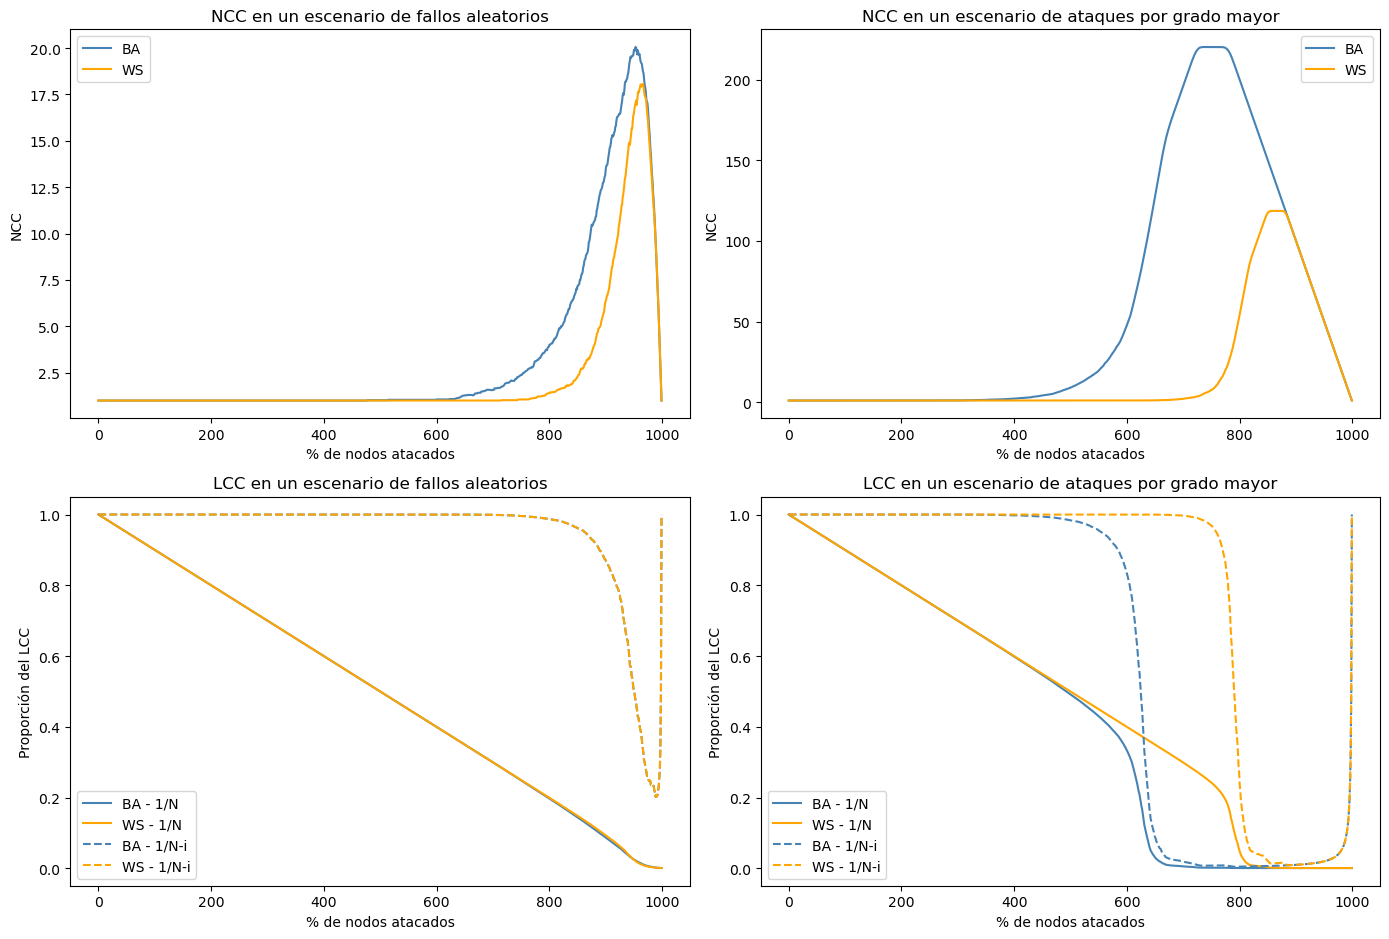

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Gráfica 1: NCC - Fallos
axs[0, 0].plot(resultados_NCC_BA_fallos, label="BA", color="steelblue")
axs[0, 0].plot(resultados_NCC_WS_fallos, label="WS", color="orange")
axs[0, 0].set_title("NCC en un escenario de fallos aleatorios")
axs[0, 0].set_xlabel("% de nodos atacados")
axs[0, 0].set_ylabel("NCC")
axs[0, 0].legend()

# Gráfica 2: NCC - Ataques
axs[0, 1].plot(resultados_NCC_BA_ataques, label="BA", color="steelblue")
axs[0, 1].plot(resultados_NCC_WS_ataques, label="WS", color="orange")
axs[0, 1].set_title("NCC en un escenario de ataques por grado mayor")
axs[0, 1].set_xlabel("% de nodos atacados")
axs[0, 1].set_ylabel("NCC")
axs[0, 1].legend()

# Gráfica 3: LCC - Fallos (criterio 1 y 2)
axs[1, 0].plot(resultados_LCC_BA_fallos_1, label="BA - 1/N", linestyle='-', color="steelblue")
axs[1, 0].plot(resultados_LCC_WS_fallos_1, label="WS - 1/N", linestyle='-', color="orange")
axs[1, 0].plot(resultados_LCC_BA_fallos_2, label="BA - 1/N-i", linestyle='--', color="steelblue")
axs[1, 0].plot(resultados_LCC_WS_fallos_2, label="WS - 1/N-i", linestyle='--', color="orange")
axs[1, 0].set_title("LCC en un escenario de fallos aleatorios")
axs[1, 0].set_xlabel("% de nodos atacados")
axs[1, 0].set_ylabel("Proporción del LCC")
axs[1, 0].legend()

# Gráfica 4: LCC - Ataques (criterio 1 y 2)
axs[1, 1].plot(resultados_LCC_BA_ataques_1, label="BA - 1/N", linestyle='-', color="steelblue")
axs[1, 1].plot(resultados_LCC_WS_ataques_1, label="WS - 1/N", linestyle='-', color="orange")
axs[1, 1].plot(resultados_LCC_BA_ataques_2, label="BA - 1/N-i", linestyle='--', color="steelblue")
axs[1, 1].plot(resultados_LCC_WS_ataques_2, label="WS - 1/N-i", linestyle='--', color="orange")
axs[1, 1].set_title("LCC en un escenario de ataques por grado mayor")
axs[1, 1].set_xlabel("% de nodos atacados")
axs[1, 1].set_ylabel("Proporción del LCC")
axs[1, 1].legend()

plt.savefig("medidas_conectividad.png",dpi=300)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()